In [18]:
import numpy as np 
import pandas as pd 
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

Coats = pd.read_table("Dan Coats.txt", header =None)
Coats.columns = ['text']
Coats['author'] = 'Dan Coats'

Mattis = pd.read_table("James Mattis.txt", header =None)
Mattis.columns = ['text']
Mattis['author'] = 'James Mattis'

Kelly = pd.read_table("John Kelly.txt", header =None)
Kelly.columns = ['text']
Kelly['author'] = 'John Kelly'

Hassett = pd.read_table("Kevin Hassett.txt", header =None)
Hassett.columns = ['text']
Hassett['author'] = 'Kevin Hassett'

Nielsen = pd.read_table("Kirstjen Nielsen.txt", header =None)
Nielsen.columns = ['text']
Nielsen['author'] = 'Kirstjen Nielsen'

Kudlow = pd.read_table("Larry Kudlow.txt", header =None)
Kudlow.columns = ['text']
Kudlow['author'] = 'Larry Kudlow'

Pence = pd.read_table("Mike Pence.txt", header =None)
Pence.columns = ['text']
Pence['author'] = 'Mike Pence'

Pompeo = pd.read_table("Mike Pompeo.txt", header =None)
Pompeo.columns = ['text']
Pompeo['author'] = 'Mike Pompeo'

In [7]:
train = pd.DataFrame()
train = pd.concat([Coats, Mattis,Kelly,Hassett,Nielsen,Kudlow,Pence,Pompeo])
train.drop(train.columns[[0]], axis=1)

# Convert the author strings into numbers
#train['author'] = train['author'].apply(lambda x: possibleAuthors[x])
#print(train)


In [11]:
print(train)

                                                 text       author
0   Good evening, and sincere thanks to the Atlant...    Dan Coats
1   I enjoyed catching up with Atlantic council bo...    Dan Coats
2   Jeff Gedmin and I were also able to spend a fe...    Dan Coats
3   Last but certainly not least I would like to  ...    Dan Coats
4   So if you don’t like or agree with my remarks ...    Dan Coats
5   There is no better venue to address the issue ...    Dan Coats
6   Duty prevented me from attending the D-Day cer...    Dan Coats
7   And a century before that, Normandy was home t...    Dan Coats
8   The writings of Alexis De Tocqueville and the ...    Dan Coats
9   As a stranger in a strange land, his insights ...    Dan Coats
10  For the rest of the world—including his fellow...    Dan Coats
11  I can’t help but wonder what Tocqueville would...    Dan Coats
12  To be sure, he would see a democracy that is m...    Dan Coats
13  But Tocqueville would also see that our democr...    Dan C

In [12]:
# I want to remove punctuation from the text for word counting purposes
import string
no_punct_translator=str.maketrans('','',string.punctuation)

# tokenize each sentence and remove punctuation
train['words'] = train['text'].apply(lambda t: nltk.word_tokenize(t.translate(no_punct_translator).lower()))

In [15]:
train['word_count'] = train['words'].apply(lambda words: len(words))

# for normalization, how many characters per sentence w/o punctuation
train['sentence_length'] = train['words'].apply(lambda w: sum(map(len, w)))

# for future calculations, let's keep around the full text length, including punctuation
train['text_length'] = train['text'].apply(lambda t: len(t))




In [16]:
train.head()

,text,author,words,word_count,sentence_length,text_length
0,"Good evening, and sincere thanks to the Atlant...",Dan Coats,"[good, evening, and, sincere, thanks, to, the,...",25,143,172
1,I enjoyed catching up with Atlantic council bo...,Dan Coats,"[i, enjoyed, catching, up, with, atlantic, cou...",32,160,191
2,Jeff Gedmin and I were also able to spend a fe...,Dan Coats,"[jeff, gedmin, and, i, were, also, able, to, s...",22,89,111
3,Last but certainly not least I would like to ...,Dan Coats,"[last, but, certainly, not, least, i, would, l...",43,197,249
4,So if you don’t like or agree with my remarks ...,Dan Coats,"[so, if, you, don, ’, t, like, or, agree, with...",17,57,73


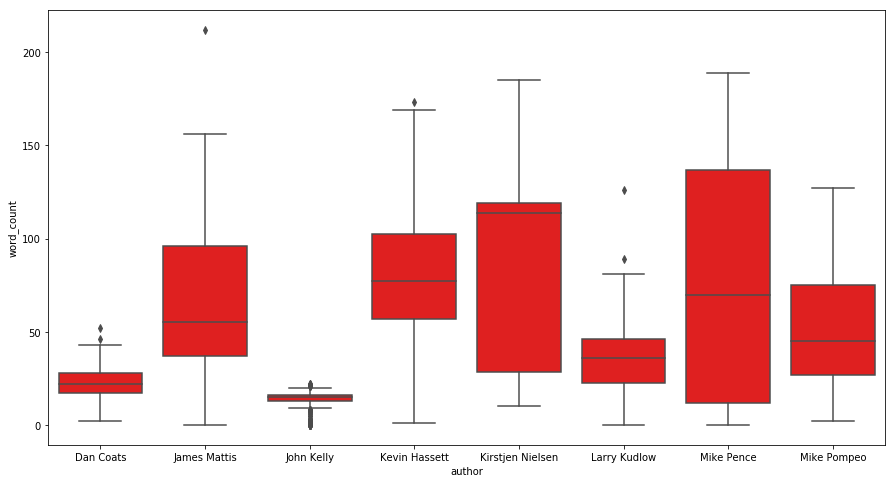

In [22]:

plt.figure(figsize=(15,8))
sns.boxplot(x = "author", y = "word_count", data=train, color = "red",)



In [20]:
train.groupby(['author'])['word_count'].describe()


,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Dan Coats,100.0,22.930000,9.146678,2.0,17.00,22.0,28.00,52.0
James Mattis,42.0,64.500000,44.683303,0.0,37.25,55.0,96.25,212.0
John Kelly,434.0,14.101382,4.449755,0.0,13.00,15.0,16.00,22.0
Kevin Hassett,72.0,80.763889,40.020239,1.0,57.00,77.0,102.25,173.0
Kirstjen Nielsen,12.0,90.500000,58.324328,10.0,28.25,113.5,119.00,185.0
Larry Kudlow,96.0,35.625000,20.325380,0.0,22.75,36.0,46.25,126.0
Mike Pence,18.0,80.777778,65.596409,0.0,11.75,69.5,137.00,189.0
Mike Pompeo,73.0,52.054795,31.078257,2.0,27.00,45.0,75.00,127.0


In [21]:
train.groupby(['author'])['sentence_length'].describe()


,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Dan Coats,100.0,112.220000,44.415981,8.0,85.00,105.0,139.00,248.0
James Mattis,42.0,285.142857,190.634444,0.0,156.00,264.5,430.50,905.0
John Kelly,434.0,69.930876,19.178867,0.0,72.00,76.0,79.00,87.0
Kevin Hassett,72.0,383.069444,191.233308,8.0,256.00,371.0,473.25,852.0
Kirstjen Nielsen,12.0,512.166667,325.710366,41.0,167.00,635.5,684.00,998.0
Larry Kudlow,96.0,162.947917,96.316405,0.0,97.25,172.5,212.50,565.0
Mike Pence,18.0,375.055556,297.069307,0.0,57.50,374.0,620.50,851.0
Mike Pompeo,73.0,239.780822,147.570628,8.0,125.00,214.0,325.00,597.0


In [25]:
# the string library defines `string.punctuation` which is all the punctuation chars
train['punctuation_count'] = train['text'].apply(lambda t: len(list(filter(lambda c: c in t, string.punctuation))))

train['punctuation_per_char'] = train['punctuation_count'] / train['text_length'] 

train.groupby(['author'])['punctuation_per_char'].describe()



,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Dan Coats,100.0,0.014638,0.010884,0.000000,0.009359,0.012308,0.016879,0.100000
James Mattis,42.0,0.018040,0.039478,0.000000,0.005716,0.008032,0.012471,0.250000
John Kelly,434.0,0.016620,0.016184,0.000000,0.010417,0.011111,0.021505,0.142857
Kevin Hassett,72.0,0.007124,0.004551,0.000000,0.004602,0.006180,0.007909,0.026316
Kirstjen Nielsen,12.0,0.016137,0.019963,0.002478,0.003830,0.004606,0.023514,0.056604
Larry Kudlow,96.0,0.018307,0.015097,0.000000,0.010088,0.014035,0.018120,0.090909
Mike Pence,18.0,0.005791,0.005048,0.000000,0.000747,0.005610,0.008154,0.016349
Mike Pompeo,73.0,0.010362,0.011055,0.002740,0.005666,0.007653,0.011494,0.090909


In [28]:
def unique_words(words):
    word_count = len(words)
    unique_count = len(set(words)) # creating a set from the list 'words' removes duplicates
    return unique_count / word_count

train['unique_ratio'] = train['words'].apply(unique_words)
train.groupby(['author'])['unique_ratio'].describe()



ZeroDivisionError: division by zero